In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import Series
from bokeh.plotting import figure, show
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

In [2]:
df = pd.read_csv("Data/IPG2211A2N.csv", index_col='DATE', parse_dates=True )
df.head()

IPG2211A2N
DATE                  
1939-01-01      3.3336
1939-02-01      3.3591
1939-03-01      3.4354
1939-04-01      3.4609
1939-05-01      3.4609

In [3]:
df.tail()

IPG2211A2N
DATE                  
2023-08-01    117.3450
2023-09-01    103.2197
2023-10-01     94.4084
2023-11-01     99.1045
2023-12-01    111.8714

In [4]:
df.duplicated().sum()

69

In [5]:
#Removing all duplicates: To remove all duplicate rows, regardless of their order, use keep=False
df.drop_duplicates(inplace=False)

IPG2211A2N
DATE                  
1939-01-01      3.3336
1939-02-01      3.3591
1939-03-01      3.4354
1939-04-01      3.4609
1939-06-01      3.5117
...                ...
2023-08-01    117.3450
2023-09-01    103.2197
2023-10-01     94.4084
2023-11-01     99.1045
2023-12-01    111.8714

[951 rows x 1 columns]

In [6]:
df.duplicated().sum()

69

In [7]:
df.dtypes

IPG2211A2N    float64
dtype: object

# Why it's needed:
- 
Extracting date components can be useful for analysis. For example, it allows you to analyze data at different granularities such as daily, monthly, or yearly patterns- .
Creating a "Weekend" column can be beneficial for understanding patterns related to weekends. This column can be used in analysis or modeling to capture potential differences in behavior between weekdays and weekends.

In [8]:
df.index = pd.to_datetime(df.index)  # Convert the index to datetime format

# Extract day, month, year, day of week, and week (same as above)
df["Day"] = df.index.day
df["Month"] = df.index.month
df["Year"] = df.index.year
df["Day of week"] = df.index.dayofweek
df["Week"] = df.index.isocalendar().week

df.head()

IPG2211A2N  Day  Month  Year  Day of week  Week
DATE                                                       
1939-01-01      3.3336    1      1  1939            6    52
1939-02-01      3.3591    1      2  1939            2     5
1939-03-01      3.4354    1      3  1939            2     9
1939-04-01      3.4609    1      4  1939            5    13
1939-05-01      3.4609    1      5  1939            0    18

In [9]:
# Filter the DataFrame to include only rows within the specified range coz, redume analysis dataframe, last 20 years could be enough for analysis.
df1 = df[(df.index >= '1980-01-01')]

In [10]:
df1.head()

IPG2211A2N  Day  Month  Year  Day of week  Week
DATE                                                       
1980-01-01     64.4041    1      1  1980            1     1
1980-02-01     63.8043    1      2  1980            4     5
1980-03-01     59.9710    1      3  1980            5     9
1980-04-01     52.3178    1      4  1980            1    14
1980-05-01     49.0551    1      5  1980            3    18

In [11]:
df1.tail()

IPG2211A2N  Day  Month  Year  Day of week  Week
DATE                                                       
2023-08-01    117.3450    1      8  2023            1    31
2023-09-01    103.2197    1      9  2023            4    35
2023-10-01     94.4084    1     10  2023            6    39
2023-11-01     99.1045    1     11  2023            2    44
2023-12-01    111.8714    1     12  2023            4    48

In [12]:
df1.dtypes

IPG2211A2N     float64
Day              int32
Month            int32
Year             int32
Day of week      int32
Week            UInt32
dtype: object

In [13]:
# Assuming df1 is your DataFrame
fig = px.line(df1, x=df1.index, y='IPG2211A2N', labels={'IPG2211A2N': 'Electric Production'})
fig.update_layout(title='Electric Production and Year', xaxis_title='Year', yaxis_title='Electric Production', height=400,
                 margin=dict(l=20, r=20, t=40, b=20)
)

# Show the plot
fig.show()


In [14]:
# Assuming df1 is DataFrame
fig = px.box(df1, y='IPG2211A2N', labels={'IPG2211A2N': 'Electric Production'})
fig.update_layout(title='Electric Production Boxplot', yaxis_title='Electric Production', height=400,
                 margin=dict(l=20, r=20, t=40, b=20)
)

# Show the plot
fig.show()

In [15]:
# Year Vs Electric Production
fig = px.bar(
    df1.groupby("Year")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Year",
    y="IPG2211A2N",
    labels={"Year": "Year", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Year vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Year",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()

In [16]:
#month vs electric production
fig = px.bar(
    df1.groupby("Month")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Month",
    y="IPG2211A2N",
    labels={"Month": "Month", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Month vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Month",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()

In [17]:
#week number vs electric production
fig = px.bar(
    df1.groupby("Week")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Week",
    y="IPG2211A2N",
    labels={"Week": "Week", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Week vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Week",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()
#Production is stable across weeks

In [18]:
#day of week vs electric production
fig = px.bar(
    df1.groupby("Day of week")["IPG2211A2N"].mean().reset_index(),  # Prepare data for Plotly
    x="Day of week",
    y="IPG2211A2N",
    labels={"Day of week": "Day of week", "IPG2211A2N": "Electric Production (Mean)"},  # Clearer labels
    title="Day of week vs. Electric Production",
    height=400,  # Adjust height as needed
)

fig.update_layout(
    xaxis_title="Day of week",  # Explicitly set axis titles
    yaxis_title="Electric Production (Mean)",
    margin=dict(l=20, r=20, t=40, b=20),  # Adjust margins for better spacing
)

fig.show()
#Production is stable across the days

In [19]:
# Resample the data
month = df1.resample("M").mean().dropna()
day = df1.resample("D").mean().dropna()
year = df1.resample("A").mean().dropna()
week = df1.resample("W").mean().dropna()

# Create subplots with shared y-axis
fig = make_subplots(  # Call the make_subplots function correctly
    rows=4, cols=1, shared_yaxes=True, subplot_titles=("Monthly", "Daily", "Yearly", "Weekly")
)

# Plot the data
trace = px.line(month, x=month.index, y="IPG2211A2N").data[0]  # Extract the first trace
fig.add_trace(trace, row=1, col=1)  # Add the extracted trace to the subplot

trace = px.line(day, x=day.index, y="IPG2211A2N").data[0]
fig.add_trace(trace, row=2, col=1)

trace = px.line(year, x=year.index, y="IPG2211A2N").data[0]
fig.add_trace(trace, row=3, col=1)

trace = px.line(week, x=week.index, y="IPG2211A2N").data[0]
fig.add_trace(trace, row=4, col=1)


#Customize Layout
fig.update_layout(
    height=1000,  # Adjust height as needed
    yaxis_title="Electric Production",
    margin=dict(l=10, r=10, t=20, b=10),  # Adjust margins for better spacing
)

# Show the plots
fig.show()

In [20]:
df1=df1.resample("M").mean()
df1.head()

IPG2211A2N  Day  Month    Year  Day of week  Week
DATE                                                         
1980-01-31     64.4041  1.0    1.0  1980.0          1.0   1.0
1980-02-29     63.8043  1.0    2.0  1980.0          4.0   5.0
1980-03-31     59.9710  1.0    3.0  1980.0          5.0   9.0
1980-04-30     52.3178  1.0    4.0  1980.0          1.0  14.0
1980-05-31     49.0551  1.0    5.0  1980.0          3.0  18.0

In [21]:
df1.tail()

IPG2211A2N  Day  Month    Year  Day of week  Week
DATE                                                         
2023-08-31    117.3450  1.0    8.0  2023.0          1.0  31.0
2023-09-30    103.2197  1.0    9.0  2023.0          4.0  35.0
2023-10-31     94.4084  1.0   10.0  2023.0          6.0  39.0
2023-11-30     99.1045  1.0   11.0  2023.0          2.0  44.0
2023-12-31    111.8714  1.0   12.0  2023.0          4.0  48.0

In [22]:
print(len(df1.index)*0.7)
df1.head()
df1[df1.index.day==31]

369.59999999999997


IPG2211A2N  Day  Month    Year  Day of week  Week
DATE                                                         
1980-01-31     64.4041  1.0    1.0  1980.0          1.0   1.0
1980-03-31     59.9710  1.0    3.0  1980.0          5.0   9.0
1980-05-31     49.0551  1.0    5.0  1980.0          3.0  18.0
1980-07-31     57.6509  1.0    7.0  1980.0          1.0  27.0
1980-08-31     59.5078  1.0    8.0  1980.0          4.0  31.0
...                ...  ...    ...     ...          ...   ...
2023-05-31     91.8044  1.0    5.0  2023.0          0.0  18.0
2023-07-31    116.8451  1.0    7.0  2023.0          5.0  26.0
2023-08-31    117.3450  1.0    8.0  2023.0          1.0  31.0
2023-10-31     94.4084  1.0   10.0  2023.0          6.0  39.0
2023-12-31    111.8714  1.0   12.0  2023.0          4.0  48.0

[308 rows x 6 columns]

In [23]:
#resample months
train=df1.loc["1980-01-01":"2016-01-01"]
valid=df1.loc["2016-01-01":]
# Create the traces for training and validation data
train_trace = go.Scatter(
    x=train.index,
    y=train["IPG2211A2N"],
    mode="lines",
    name="Train",
    line=dict(color="blue", width=2),
)
valid_trace = go.Scatter(
    x=valid.index,
    y=valid["IPG2211A2N"],
    mode="lines",
    name="Valid",
    line=dict(color="orange", width=2),
)

# Create the figure
fig = go.Figure(data=[train_trace, valid_trace])

# Customize the layout
fig.update_layout(
    title="Electric Production (Train vs. Valid)",
    xaxis_title="Year",
    yaxis_title="Electric production",
    font=dict(size=14),  # Set font size for labels
    width=1200,  # Adjust width for better visualization
    height=600,  # Adjust height for better visualization
)

# Display the plot
fig.show()

In [24]:
# Naive forecasts
arr = np.asarray(train.IPG2211A2N)
y_hat = valid.copy()
y_hat["naive"] = arr[len(arr) - 1]

# Create traces
train_trace = go.Scatter(
    x=train.index,
    y=train["IPG2211A2N"],
    mode="lines",
    name="Train",
    line=dict(color="blue", width=2),
)
valid_trace = go.Scatter(
    x=valid.index,
    y=valid["IPG2211A2N"],
    mode="lines",
    name="Valid",
    line=dict(color="orange", width=2),
)
naive_trace = go.Scatter(
    x=y_hat.index,
    y=y_hat["naive"],
    mode="lines",
    name="Naive Forecast",
    line=dict(color="green", width=2, dash="dash"),  # Dashed for visual distinction
)

# Create figure
fig = go.Figure(data=[train_trace, valid_trace, naive_trace])

# Customize layout
fig.update_layout(
    title="Electric Production (Train vs. Valid vs. Naive Forecast)",
    xaxis_title="Date",
    yaxis_title="Electric production",
    font=dict(size=14),  # Set font size for labels
    width=1200,  # Adjust width for better visualization
    height=600,  # Adjust height for better visualization
)

# Display the plot
fig.show()

In [25]:
# Naive Approach 
naive_table = y_hat[['IPG2211A2N', 'naive']].copy()  # Select relevant columns
naive_table['difference'] = naive_table['IPG2211A2N'] - naive_table['naive']
print(naive_table.to_string())

            IPG2211A2N     naive  difference
DATE                                        
2016-01-31    115.1674  100.7938     14.3736
2016-02-29    104.3863  100.7938      3.5925
2016-03-31     92.8190  100.7938     -7.9748
2016-04-30     86.8329  100.7938    -13.9609
2016-05-31     88.1170  100.7938    -12.6768
2016-06-30    101.8577  100.7938      1.0639
2016-07-31    112.4728  100.7938     11.6790
2016-08-31    113.7737  100.7938     12.9799
2016-09-30    100.7216  100.7938     -0.0722
2016-10-31     89.5038  100.7938    -11.2900
2016-11-30     91.2208  100.7938     -9.5730
2016-12-31    112.2986  100.7938     11.5048
2017-01-31    114.8147  100.7938     14.0209
2017-02-28     98.2106  100.7938     -2.5832
2017-03-31     99.6345  100.7938     -1.1593
2017-04-30     85.9082  100.7938    -14.8856
2017-05-31     89.2046  100.7938    -11.5892
2017-06-30     99.1950  100.7938     -1.5988
2017-07-31    109.8528  100.7938      9.0590
2017-08-31    106.3907  100.7938      5.5969
2017-09-30

In [26]:
# Assuming valid.IPG2211A2N and y_hat["naive"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat["naive"]

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 10.28039686636659


- Simple Average's Inherent Limitation: As a simple average, it can't capture this upward trend. It remains constant at the overall mean of the training data, which is lower than the increasing values in the validation set.

In [27]:
#simple average
# Assuming valid and train are DataFrames with Date as index
y_hat = valid.copy()
y_hat['simple average'] = train.IPG2211A2N.mean()

# Create traces for each line
trace_train = go.Scatter(x=train.index, y=train.IPG2211A2N, name="train", mode='lines')
trace_valid = go.Scatter(x=valid.index, y=valid.IPG2211A2N, name="Valid", mode='lines')
trace_average = go.Scatter(x=y_hat.index, y=y_hat['simple average'], name="simple average", mode='lines')

# Create the figure
fig = go.Figure(data=[trace_train, trace_valid, trace_average])

# Customize layout
fig.update_layout(
    title="Electric Production",
    xaxis_title="Date",
    yaxis_title="Electric production",
    width=1200,  # Adjust width as needed
    height=600,  # Adjust height as needed
    font=dict(size=14)
)

# Show the plot
fig.show()

In [28]:
# Assuming valid.IPG2211A2N and y_hat["naive"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat["simple average"]

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 22.687552956634452


#### Moving average rolling(10)

In [29]:
#Moving average 1
# Assuming valid and train are DataFrames with Date as index
y_hat = valid.copy()
y_hat["moving average"]=train.IPG2211A2N.rolling(10).mean().iloc[-1]

# Create traces for each line
trace_train = go.Scatter(x=train.index, y=train.IPG2211A2N, name="train", mode='lines')
trace_valid = go.Scatter(x=valid.index, y=valid.IPG2211A2N, name="Valid", mode='lines')
trace_average = go.Scatter(x=y_hat.index, y=y_hat['moving average'], name="moving average", mode='lines')

# Create the figure
fig = go.Figure(data=[trace_train, trace_valid, trace_average])

# Customize layout
fig.update_layout(
    title="Electric Production",
    xaxis_title="Date",
    yaxis_title="Electric production",
    width=1200,  # Adjust width as needed
    height=600,  # Adjust height as needed
    font=dict(size=14)
)

# Show the plot
fig.show()



| Feature | Simple Average | Moving Average |
|---|---|---|
| Calculation | Average of all data points | Average of a sub-set of data points |
| Weighting | Equal weight to all points | More weight to recent points |
| Trends & Seasonality | Less effective | Captures trends and seasonality |
| Responsiveness to Changes | Slow | Adapts to recent changes |
| Outlier Sensitivity | More sensitive | Less sensitive |
| Major Importance | Quick & easy for short-term, stable data | Accurate for trends & seasonality, adapts to r commenting and adding tables in your Jupyter Notebook.


In [30]:
# Moving Average
moving_avg_table = y_hat[['IPG2211A2N', 'moving average']].copy()
moving_avg_table['difference'] = moving_avg_table['IPG2211A2N'] - moving_avg_table['moving average']
print(moving_avg_table.to_string())

            IPG2211A2N  moving average  difference
DATE                                              
2016-01-31    115.1674        98.16783    16.99957
2016-02-29    104.3863        98.16783     6.21847
2016-03-31     92.8190        98.16783    -5.34883
2016-04-30     86.8329        98.16783   -11.33493
2016-05-31     88.1170        98.16783   -10.05083
2016-06-30    101.8577        98.16783     3.68987
2016-07-31    112.4728        98.16783    14.30497
2016-08-31    113.7737        98.16783    15.60587
2016-09-30    100.7216        98.16783     2.55377
2016-10-31     89.5038        98.16783    -8.66403
2016-11-30     91.2208        98.16783    -6.94703
2016-12-31    112.2986        98.16783    14.13077
2017-01-31    114.8147        98.16783    16.64687
2017-02-28     98.2106        98.16783     0.04277
2017-03-31     99.6345        98.16783     1.46667
2017-04-30     85.9082        98.16783   -12.25963
2017-05-31     89.2046        98.16783    -8.96323
2017-06-30     99.1950        9

In [31]:
# Assuming valid.IPG2211A2N and y_hat["moving average"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat["moving average"]

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 11.149719729716672


### Moving average rolling(20)

In [32]:
#Moving average 2
# Assuming valid and train are DataFrames with Date as index
y_hat = valid.copy()
y_hat["moving average(20)"]=train.IPG2211A2N.rolling(20).mean().iloc[-1]

# Create traces for each line
trace_train = go.Scatter(x=train.index, y=train.IPG2211A2N, name="train", mode='lines')
trace_valid = go.Scatter(x=valid.index, y=valid.IPG2211A2N, name="Valid", mode='lines')
trace_average = go.Scatter(x=y_hat.index, y=y_hat['moving average(20)'], name="moving average", mode='lines')

# Create the figure
fig = go.Figure(data=[trace_train, trace_valid, trace_average])

# Customize layout
fig.update_layout(
    title="Electric Production",
    xaxis_title="Date",
    yaxis_title="Electric production",
    width=1200,  # Adjust width as needed
    height=600,  # Adjust height as needed
    font=dict(size=14)
)

# Show the plot
fig.show()

In [33]:
# Assuming valid.IPG2211A2N and y_hat["moving average"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat["moving average(20)"]

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 10.308091604876482


### Moving Average(30)

In [34]:
#Moving average 2
# Assuming valid and train are DataFrames with Date as index
y_hat = valid.copy()
y_hat["moving average(30)"]=train.IPG2211A2N.rolling(30).mean().iloc[-1]

# Create traces for each line
trace_train = go.Scatter(x=train.index, y=train.IPG2211A2N, name="train", mode='lines')
trace_valid = go.Scatter(x=valid.index, y=valid.IPG2211A2N, name="Valid", mode='lines')
trace_average = go.Scatter(x=y_hat.index, y=y_hat['moving average(30)'], name="moving average", mode='lines')

# Create the figure
fig = go.Figure(data=[trace_train, trace_valid, trace_average])

# Customize layout
fig.update_layout(
    title="Electric Production",
    xaxis_title="Date",
    yaxis_title="Electric production",
    width=1200,  # Adjust width as needed
    height=600,  # Adjust height as needed
    font=dict(size=14)
)

# Show the plot
fig.show()

In [35]:
# Assuming valid.IPG2211A2N and y_hat["moving average"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat["moving average(30)"]

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 10.132300159313942


In [36]:
#Moving average forecast works best for 20 values when it comes to this particular dataset.

In [37]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Fit the Simple Exponential Smoothing model
fit = SimpleExpSmoothing(train.IPG2211A2N).fit(smoothing_level=0.3, optimized=False)
y_hat["SES"] = fit.forecast(len(valid))

# Create traces for each dataset
trace_train = go.Scatter(x=train.index, y=train.IPG2211A2N, name="train", mode='lines')
trace_valid = go.Scatter(x=valid.index, y=valid.IPG2211A2N, name="Valid", mode='lines')
trace_ses = go.Scatter(x=y_hat.index, y=y_hat["SES"], name="Simple Exp Smoothing", mode='lines')

# Create the Plotly figure
fig = go.Figure(data=[trace_train, trace_valid, trace_ses])

# Customize the layout
fig.update_layout(
    title="Electric Production",
    xaxis_title="Date",
    yaxis_title="Electric production",
    width=1200,  # Adjust width as needed
    height=600,  # Adjust height as needed
    font=dict(size=14)
)

# Show the plot
fig.show()


| Feature                 | Simple Exponential Smoothing (SES)            | Moving Average (MA)                             |
|-------------------------|---------------------------------------------|-------------------------------------------------|
| **Weighting**           | Decreasing weights for older data points    | Equal or varying weights within a fixed window |
| **Responsiveness**      | More responsive to recent changes           | Less responsive, focuses on overall trend       |
| **Suitable for**        | Short-term forecasts, capturing recent trends | Long-term forecasts, smoothing noise, identifying trends |
| **Limitations**         | Overreaction to noise, insensitive to long-term trends | Lags behind changes, insensitive to recent variations |


- **Generally:**

1. Use SES for: highly dynamic data, short-term predictions, quick trend identification.
2. Use MA for: noisy data, long-term forecasts, stable trends, seasonal patterns.
ns.

In [38]:
# Assuming valid.IPG2211A2N and y_hat["simple exponential average"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat["SES"]

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 11.307572301953696


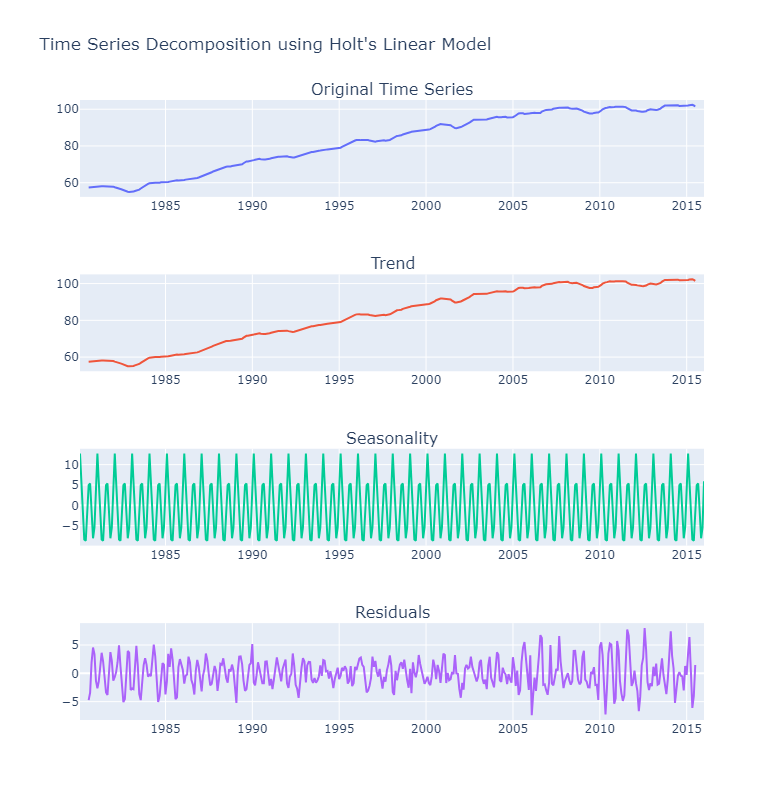

In [39]:
from plotly.subplots import make_subplots
import statsmodels.api as sm

# Assuming 'train' is your DataFrame with the time series
fig = make_subplots(rows=4, cols=1, subplot_titles=('Original Time Series', 'Trend', 'Seasonality', 'Residuals'))

# Decompose the time series
result = sm.tsa.seasonal_decompose(train['IPG2211A2N'])

# Plotting the original time series
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, mode='lines', name='Original Time Series'), row=1, col=1)

# Plotting the trend component
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)

# Plotting the seasonality component
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines', name='Seasonality'), row=3, col=1)

# Plotting the residuals
fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, mode='lines', name='Residuals'), row=4, col=1)

# Update layout for better presentation
fig.update_layout(height=800, width=1200, title_text="Time Series Decomposition using Holt's Linear Model",
                  showlegend=False)

# Show the plot
fig.show()

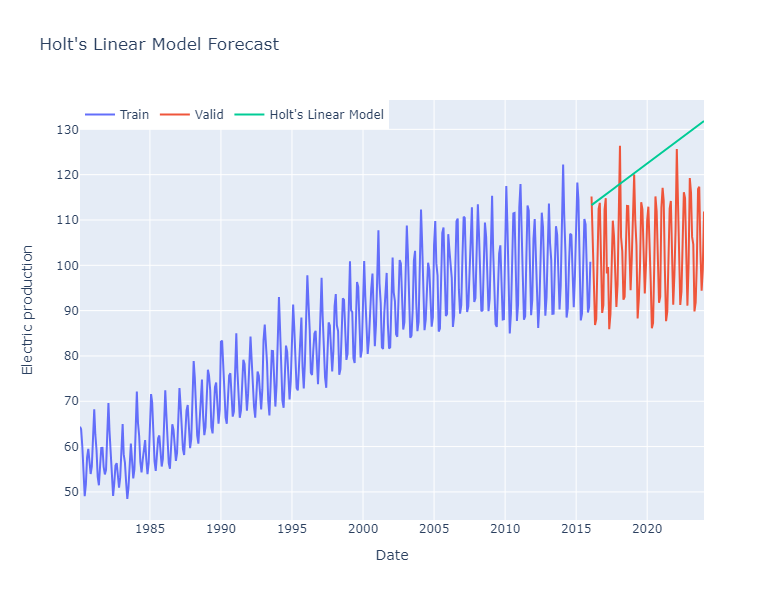

In [40]:
from statsmodels.tsa.holtwinters import Holt

# Assuming 'train' and 'valid' are your DataFrames
y_hat = valid.copy()

# Fit Holt's Linear Model with the updated parameter name
fit1 = Holt(np.asarray(train['IPG2211A2N'])).fit(smoothing_level=0.01, smoothing_trend=0.01, optimized=False)
y_hat["Holt's Linear Model"] = fit1.forecast(len(valid))

# Create Plotly figure
fig = make_subplots(rows=1, cols=1)

# Plotting the train, valid, and Holt's Linear Model
fig.add_trace(go.Scatter(x=train.index, y=train['IPG2211A2N'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=valid.index, y=valid['IPG2211A2N'], mode='lines', name='Valid'))
fig.add_trace(go.Scatter(x=y_hat.index, y=y_hat["Holt's Linear Model"], mode='lines', name="Holt's Linear Model"))

# Update layout for better presentation
fig.update_layout(height=600, width=800, title_text="Holt's Linear Model Forecast",
                  xaxis_title="Date", yaxis_title="Electric production",
                  legend=dict(x=0, y=1, traceorder='normal', orientation='h'))

# Show the plot
fig.show()


In [41]:
# Assuming valid.IPG2211A2N and y_hat["simple exponential average"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat["Holt's Linear Model"]

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 22.332089422417816


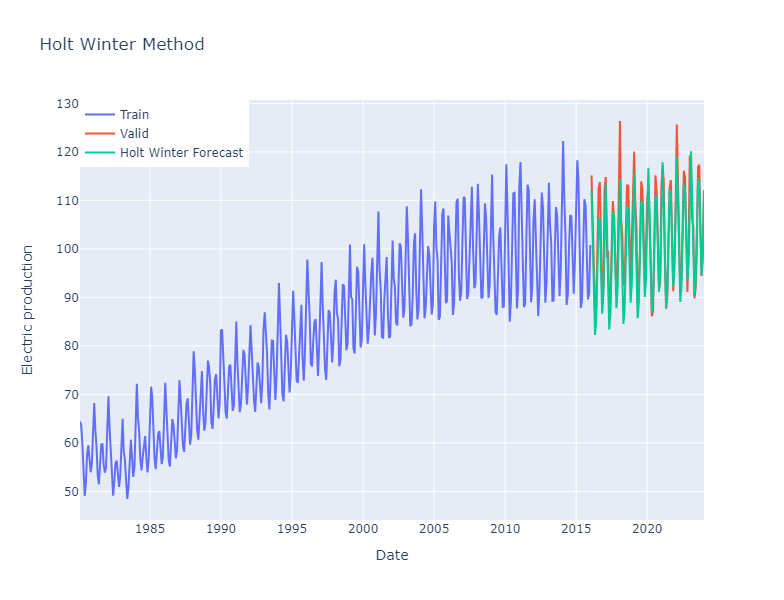

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Assuming you have 'train', 'valid', 'y_hat' already defined

fig = go.Figure()

# Plot train data
fig.add_trace(go.Scatter(x=train.index, y=train.IPG2211A2N, mode='lines', name='Train'))

# Plot validation data
fig.add_trace(go.Scatter(x=valid.index, y=valid.IPG2211A2N, mode='lines', name='Valid'))

# Fit Holt Winter model
fit2 = ExponentialSmoothing(np.asarray(train.IPG2211A2N), trend="add", seasonal="add", seasonal_periods=12).fit()

# Forecast using Holt Winter model
y_hat["Holt Winter"] = fit2.forecast(len(valid))

# Plot Holt Winter forecast
fig.add_trace(go.Scatter(x=valid.index, y=y_hat["Holt Winter"], mode='lines', name='Holt Winter Forecast'))

# Update layout
fig.update_layout(
    title="Holt Winter Method",
    xaxis_title="Date",
    yaxis_title="Electric production",
    legend=dict(x=0, y=1, traceorder='normal'),
    showlegend=True,
    autosize=False,
    width=1000,
    height=600,
)

# Show plot
fig.show()

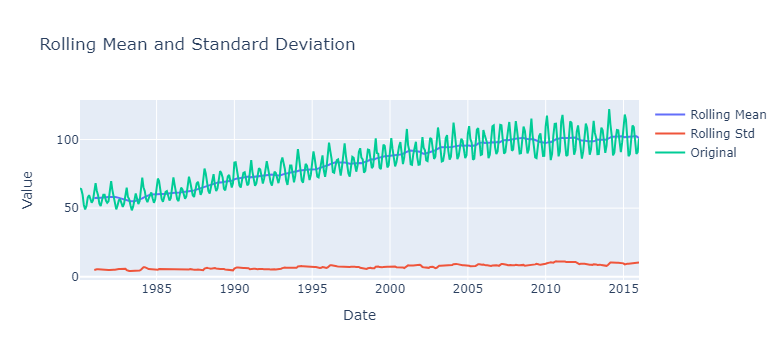

Results of Dickey Fuller test
Test stat               -1.373869
P-Value                  0.594737
# of Lags               15.000000
# of Obs               416.000000
Critical values 1%      -3.446168
Critical values 5%      -2.868513
Critical values 10%     -2.570484
dtype: float64


In [43]:
from statsmodels.tsa.api import adfuller

def test_stationarity(timeseries):
    roll_mean = timeseries.rolling(12).mean()  # last 12 values because 12 months in a year
    roll_std = timeseries.rolling(12).std()

    trace1 = go.Scatter(x=timeseries.index, y=roll_mean, mode='lines', name='Rolling Mean')
    trace2 = go.Scatter(x=timeseries.index, y=roll_std, mode='lines', name='Rolling Std')
    trace3 = go.Scatter(x=timeseries.index, y=timeseries, mode='lines', name='Original')

    layout = dict(title='Rolling Mean and Standard Deviation',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Value'),
                  )

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    fig.show()

    print("Results of Dickey Fuller test")
    dftest = adfuller(timeseries, autolag="AIC")
    new_series = pd.Series(dftest[0:4], index=["Test stat", "P-Value", "# of Lags", "# of Obs"])
    for key, val in dftest[4].items():
        new_series["Critical values %s" % key] = val
    print(new_series)

# Assuming `train` is a DataFrame with a datetime index
test_stationarity(train['IPG2211A2N'])

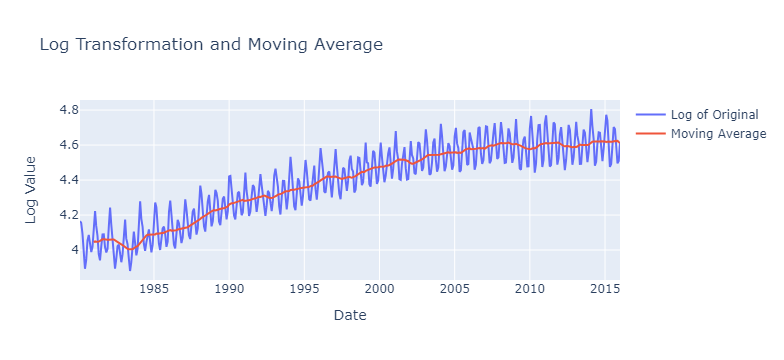

In [44]:
train_log = np.log(train['IPG2211A2N'])
moving_avg = train_log.rolling(12).mean()

trace1 = go.Scatter(x=train_log.index, y=train_log, mode='lines', name='Log of Original')
trace2 = go.Scatter(x=train_log.index, y=moving_avg, mode='lines', name='Moving Average')

layout = dict(title='Log Transformation and Moving Average',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Log Value'),
              )

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

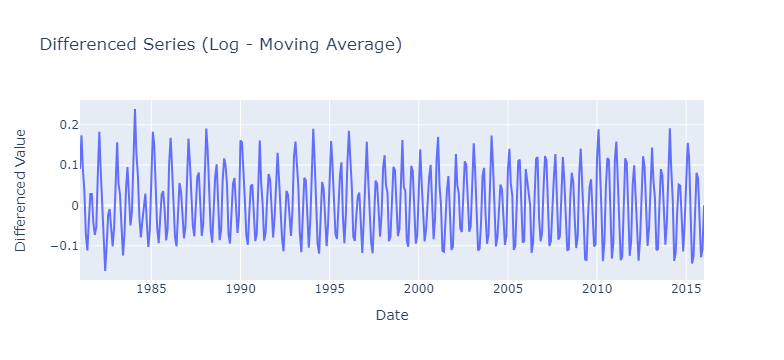

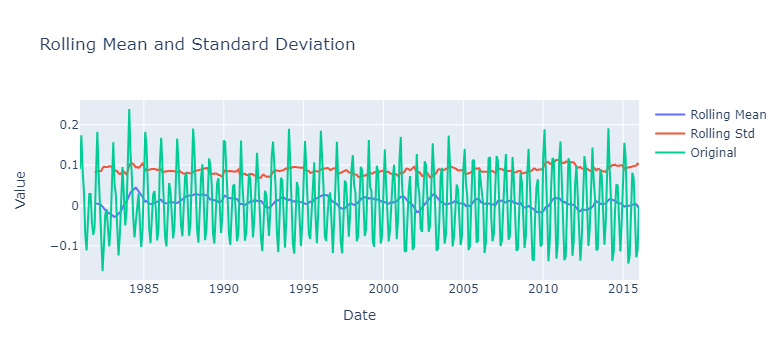

Results of Dickey Fuller test
Test stat             -6.191339e+00
P-Value                6.112339e-08
# of Lags              1.400000e+01
# of Obs               4.060000e+02
Critical values 1%    -3.446560e+00
Critical values 5%    -2.868685e+00
Critical values 10%   -2.570576e+00
dtype: float64


In [45]:
log_diff = train_log - moving_avg
log_diff = log_diff.dropna()

trace1 = go.Scatter(x=log_diff.index, y=log_diff, mode='lines', name='Log - Moving Average')

layout = dict(title='Differenced Series (Log - Moving Average)',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Differenced Value'),
              )

fig = go.Figure(data=[trace1], layout=layout)
fig.show()

test_stationarity(log_diff)


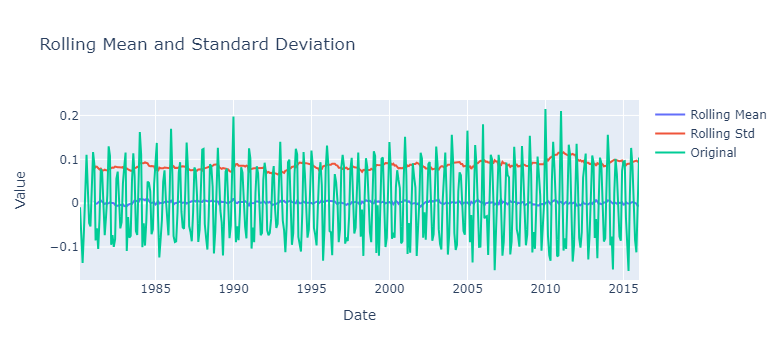

Results of Dickey Fuller test
Test stat             -6.460210e+00
P-Value                1.449547e-08
# of Lags              1.400000e+01
# of Obs               4.160000e+02
Critical values 1%    -3.446168e+00
Critical values 5%    -2.868513e+00
Critical values 10%   -2.570484e+00
dtype: float64


In [46]:
#taking care of both trend and seasonality
new_train_log=train_log-train_log.shift(1)
new_train_log.dropna(inplace=True)
test_stationarity(new_train_log)

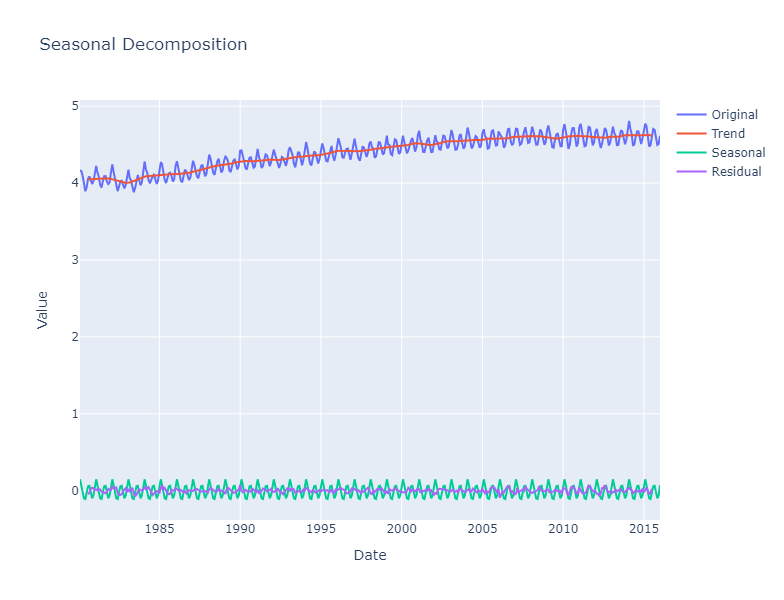

In [47]:
from statsmodels.tsa.api import seasonal_decompose
decompose = seasonal_decompose(train_log, period=12)
residual = decompose.resid
seasonal = decompose.seasonal
trend = decompose.trend

trace1 = go.Scatter(x=train_log.index, y=train_log, mode='lines', name='Original')
trace2 = go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend')
trace3 = go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonal')
trace4 = go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual')

layout = dict(title='Seasonal Decomposition',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Value'),
              )

fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.update_layout(height=600, width=1200, title_text="Seasonal Decomposition")
fig.show()

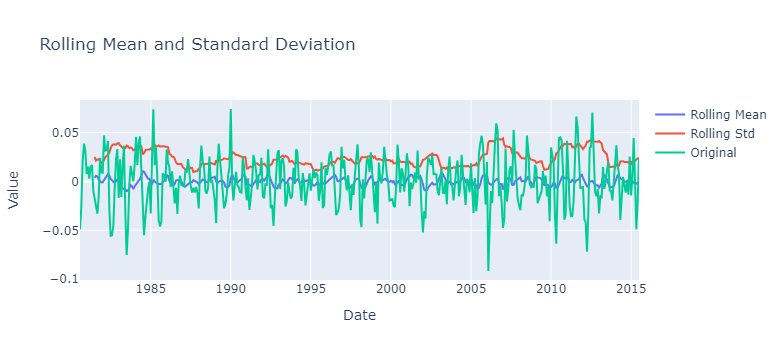

Results of Dickey Fuller test
Test stat             -9.387759e+00
P-Value                6.687517e-16
# of Lags              1.400000e+01
# of Obs               4.050000e+02
Critical values 1%    -3.446600e+00
Critical values 5%    -2.868703e+00
Critical values 10%   -2.570586e+00
dtype: float64


In [48]:
#decompose residual's trend and stationarity
train_log_decompose = residual
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose)

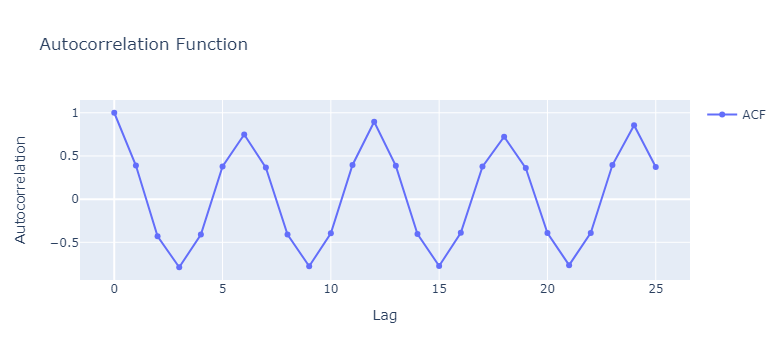

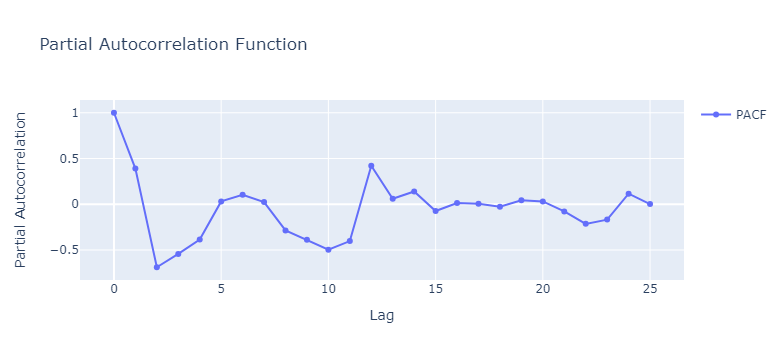

In [49]:
from statsmodels.tsa.stattools import acf, pacf

# Assuming you have a new_train_log DataFrame or Series
lag_acf = acf(new_train_log, nlags=25)
lag_pacf = pacf(new_train_log, nlags=25, method="ols")

# Plotting ACF
trace_acf = go.Scatter(x=list(range(len(lag_acf))), y=lag_acf, mode='lines+markers', name='ACF')
layout_acf = dict(title='Autocorrelation Function',
                  xaxis=dict(title='Lag'),
                  yaxis=dict(title='Autocorrelation'),
                  )
fig_acf = go.Figure(data=[trace_acf], layout=layout_acf)
fig_acf.update_layout(showlegend=True)
fig_acf.show()

# Plotting PACF
trace_pacf = go.Scatter(x=list(range(len(lag_pacf))), y=lag_pacf, mode='lines+markers', name='PACF')
layout_pacf = dict(title='Partial Autocorrelation Function',
                   xaxis=dict(title='Lag'),
                   yaxis=dict(title='Partial Autocorrelation'),
                   )
fig_pacf = go.Figure(data=[trace_pacf], layout=layout_pacf)
fig_pacf.update_layout(showlegend=True)
fig_pacf.show()

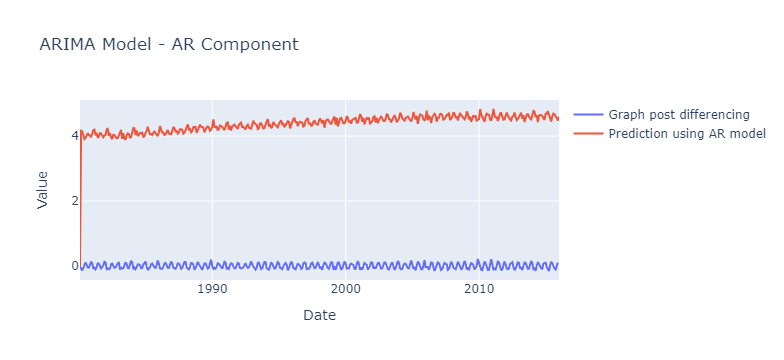

In [50]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a new_train_log DataFrame or Series
model = ARIMA(train_log, order=(2, 1, 0))
results_AR = model.fit()

trace1 = go.Scatter(x=train_log.index, y=new_train_log, mode='lines', name='Graph post differencing')
trace2 = go.Scatter(x=results_AR.fittedvalues.index, y=results_AR.fittedvalues, mode='lines', name='Prediction using AR model')

layout = dict(title='ARIMA Model - AR Component',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Value'),
              )

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(showlegend=True)
fig.show()

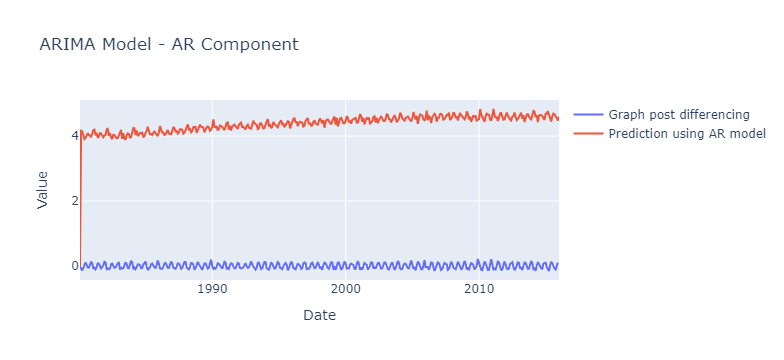

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a new_train_log DataFrame or Series
model = ARIMA(train_log, order=(2, 1, 0))
results_AR = model.fit()

trace1 = go.Scatter(x=train_log.index, y=new_train_log, mode='lines', name='Graph post differencing')
trace2 = go.Scatter(x=results_AR.fittedvalues.index, y=results_AR.fittedvalues, mode='lines', name='Prediction using AR model')

layout = dict(title='ARIMA Model - AR Component',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Value'),
              )

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(showlegend=True)
fig.show()

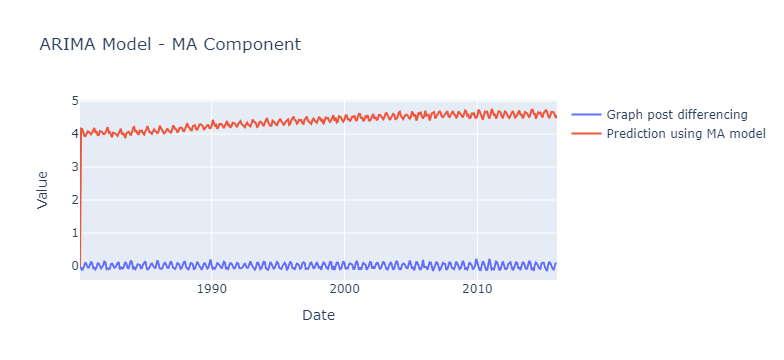

In [52]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a new_train_log DataFrame or Series
model = ARIMA(train_log, order=(0, 1, 3))
results_MA = model.fit()

trace1 = go.Scatter(x=train_log.index, y=new_train_log, mode='lines', name='Graph post differencing')
trace2 = go.Scatter(x=results_MA.fittedvalues.index, y=results_MA.fittedvalues, mode='lines', name='Prediction using MA model')

layout = dict(title='ARIMA Model - MA Component',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Value'),
              )

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(showlegend=True)
fig.show()

D:\Anaconda\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



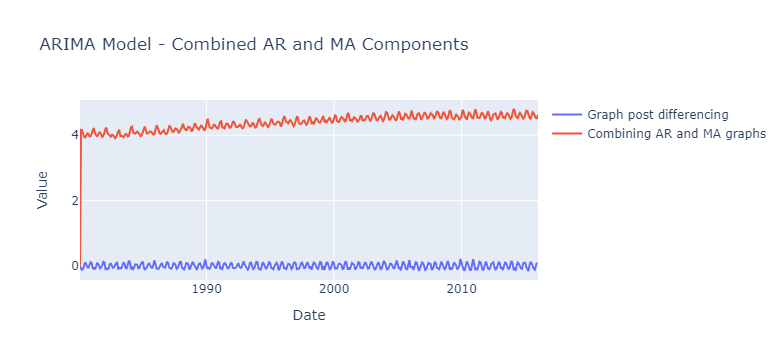

In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a new_train_log DataFrame or Series
model_combined = ARIMA(train_log, order=(2, 1, 3))
results_combined = model_combined.fit()

trace1 = go.Scatter(x=train_log.index, y=new_train_log, mode='lines', name='Graph post differencing')
trace2 = go.Scatter(x=results_combined.fittedvalues.index, y=results_combined.fittedvalues, mode='lines', name='Combining AR and MA graphs')

layout = dict(title='ARIMA Model - Combined AR and MA Components',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Value'),
              )

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(showlegend=True)
fig.show()

D:\Anaconda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

overflow encountered in exp



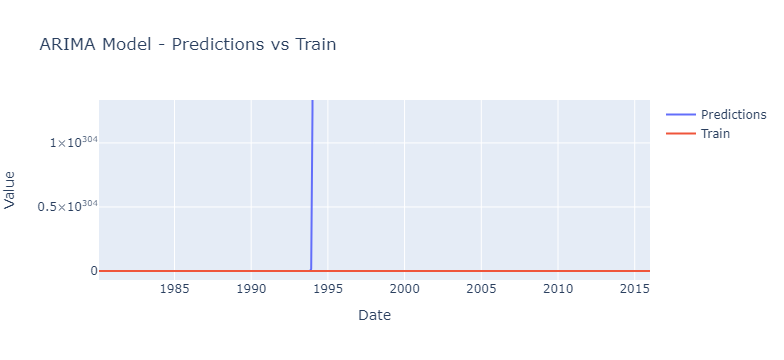

In [54]:
# Assuming you have a train DataFrame
predictions_diff = pd.Series(results_combined.fittedvalues)

predictions_diff_cumsum = predictions_diff.cumsum()
combined_model = pd.Series(train_log.iloc[0], index=train_log.index)
combined_model = combined_model.add(predictions_diff_cumsum, fill_value=0)
exp_model = np.exp(combined_model)

trace1 = go.Scatter(x=exp_model.index, y=exp_model, mode='lines', name='Predictions')
trace2 = go.Scatter(x=train['IPG2211A2N'].index, y=train['IPG2211A2N'], mode='lines', name='Train')

layout = dict(title='ARIMA Model - Predictions vs Train',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Value'),
              )

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.update_layout(showlegend=True)
fig.show()

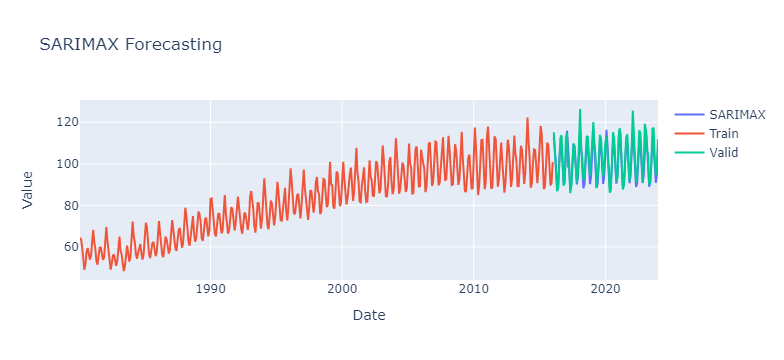

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y_hat = valid.copy()
model_sarimax = SARIMAX(train['IPG2211A2N'], seasonal_order=(0, 1, 1, 12), order=(1, 1, 4)).fit()
y_hat['SARIMAX'] = model_sarimax.forecast(len(valid))

trace1 = go.Scatter(x=y_hat.index, y=y_hat['SARIMAX'], mode='lines', name='SARIMAX')
trace2 = go.Scatter(x=train.index, y=train['IPG2211A2N'], mode='lines', name='Train')
trace3 = go.Scatter(x=valid.index, y=valid['IPG2211A2N'], mode='lines', name='Valid')

layout = dict(title='SARIMAX Forecasting',
              xaxis=dict(title='Date'),
              yaxis=dict(title='Value'),
              )

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.update_layout(showlegend=True)
fig.show()

In [56]:
# Assuming valid.IPG2211A2N and y_hat["simple exponential average"] are numpy arrays or lists
actual_values = valid.IPG2211A2N
predicted_values = y_hat['SARIMAX']

squared_errors = (actual_values - predicted_values) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.0715347398512085
